# Stochastic Reduce Order Model Example 3

- Author: Mohit S. Chauhan 
- Date: Oct 15, 2018

In this example, Uncertainty in eigenvalues of a system is studied using SROM and it is compared with the Monte Carlo Simulation results. Stiffness of each element (i.e. k1, k2 and k3) are treated as random variables which follows gamma distribution. SROM is created for all three random variables and distribution of eigenvalues are identified using SROM.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the MCS, STS and SROM class from UQpy.

In [1]:
from UQpy.sampling import MonteCarloSampling, TrueStratifiedSampling
from UQpy.sampling import RectangularStrata
from UQpy.distributions import Gamma
from UQpy.surrogates import SROM
from UQpy.RunModel import RunModel
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
The selected optimizer method does not support bounds and thus will be ignored.
The selected optimizer method does not support bounds and thus

Create a distribution object for Gamma distribution with shape, shift and scale parameters as 2, 1 and 3.

In [2]:
marginals = [Gamma(a=2., loc=1., scale=3.), Gamma(a=2., loc=1., scale=3.), Gamma(a=2., loc=1., scale=3.)]

Create a strata object.

In [3]:
strata = RectangularStrata(strata_number=[3, 3, 3])

Using UQpy STS class to generate samples for two random variables having Gamma distribution.

In [4]:
x = TrueStratifiedSampling(distributions=marginals, strata_object=strata, nsamples_per_stratum=1)

Run SROM to minimize the error in distribution, first order and second order moment about origin.

In [5]:
y = SROM(samples=x.samples, target_distributions=marginals, moments=[[6, 6, 6], [54, 54, 54]],
         weights_errors=[1, 1, 0], properties=[True, True, True, False])

Plot the sample sets and weights from SROM class. Also, compared with the CDF of gamma distrbution of k1.

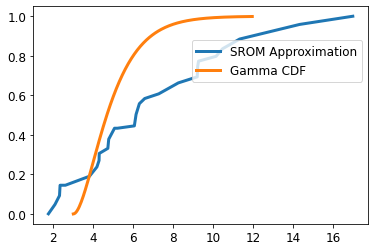

In [6]:
# Arrange samples in increasing order and sort samples accordingly
com = np.append(y.samples, np.transpose(np.matrix(y.sample_weights)), 1)
srt = com[np.argsort(com[:, 0].flatten())]
s = np.array(srt[0, :, 0])
a = srt[0, :, 3]
a0 = np.array(np.cumsum(a))
# Plot the SROM approximation and compare with actual gamma distribution
l = 3
fig = plt.figure()
plt.rcParams.update({'font.size': 12})
plt.plot(s[0], a0[0], linewidth=l)
plt.plot(np.arange(3, 12, 0.05), gamma.cdf(np.arange(3, 12, 0.05), a=2, loc=3, scale=1), linewidth=l)
plt.legend(['SROM Approximation', 'Gamma CDF'], loc=5, prop={'size': 12}, bbox_to_anchor=(1, 0.75))
plt.show()

Run the model 'eigenvalue_model.py' for each sample generated through STS class. This model defines the stiffness matrix corresponding to each sample and estimate the eigenvalues of the matrix.

In [7]:
model = RunModel(model_script='eigenvalue_model.py')
model.run(samples=y.samples)
r_srom = model.qoi_list

MCS class is used to generate 1000 samples.

In [8]:
x_mcs = MonteCarloSampling(distributions=marginals, nsamples=1000)

Run the model 'eigenvalue_model.py' for each sample generated through MCS class

In [9]:
model.run(samples=x_mcs.samples, append_samples=False)
r_mcs = model.qoi_list

Plot the distribution of each eigenvalue, estimated using SROM and MCS weights.

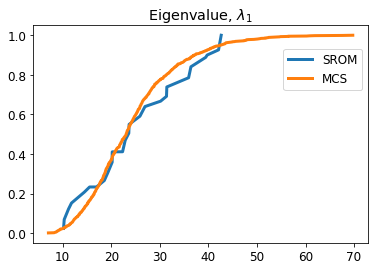

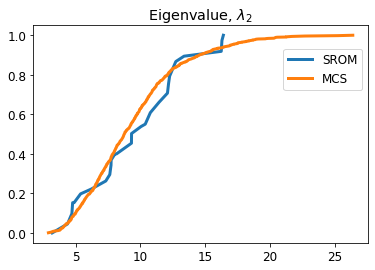

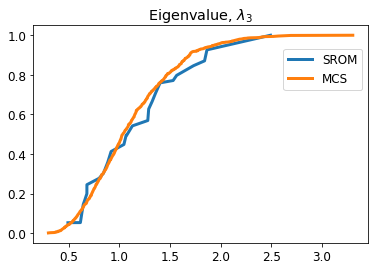

In [10]:
# Plot SROM and MCS approximation for first eigenvalue
r = np.array(r_srom)[:, 0]
r_mcs = np.array(r_mcs)
com = np.append(np.atleast_2d(r).T, np.transpose(np.matrix(y.sample_weights)), 1)
srt = com[np.argsort(com[:, 0].flatten())]
s = np.array(srt[0, :, 0])
a = srt[0, :, 1]
a0 = np.array(np.cumsum(a))
fig1 = plt.figure()
plt.plot(s[0], a0[0], linewidth=l)
r_mcs0 = r_mcs[np.argsort(r_mcs[:, 0].flatten())]
plt.plot(r_mcs0[:, 0], np.cumsum(0.001*np.ones([1, 1000])), linewidth=l)
plt.title('Eigenvalue, $\lambda_1$')
plt.legend(['SROM', 'MCS'], loc=1, prop={'size': 12}, bbox_to_anchor=(1, 0.92))
plt.show()

# Plot SROM and MCS approximation for second eigenvalue
r = np.array(r_srom)[:, 1]
com = np.append(np.atleast_2d(r).T, np.transpose(np.matrix(y.sample_weights)), 1)
srt = com[np.argsort(com[:, 0].flatten())]
s = np.array(srt[0, :, 0])
a = srt[0, :, 1]
a0 = np.array(np.cumsum(a))
fig2 = plt.figure()
plt.plot(s[0], a0[0], linewidth=l)
r_mcs0 = r_mcs[np.argsort(r_mcs[:, 1].flatten())]
plt.plot(r_mcs0[:, 1], np.cumsum(0.001*np.ones([1, 1000])), linewidth=l)
plt.title('Eigenvalue, $\lambda_2$')
plt.legend(['SROM', 'MCS'], loc=1, prop={'size': 12}, bbox_to_anchor=(1, 0.92))
plt.show()

# Plot SROM and MCS approximation for third eigenvalue
r = np.array(r_srom)[:, 2]
com = np.append(np.atleast_2d(r).T, np.transpose(np.matrix(y.sample_weights)), 1)
srt = com[np.argsort(com[:, 0].flatten())]
s = np.array(srt[0, :, 0])
a = srt[0, :, 1]
a0 = np.array(np.cumsum(a))
fig3 = plt.figure()
plt.plot(s[0], a0[0], linewidth=l)
r_mcs0 = r_mcs[np.argsort(r_mcs[:, 2].flatten())]
plt.plot(r_mcs0[:, 2], np.cumsum(0.001*np.ones([1, 1000])), linewidth=l)
plt.title('Eigenvalue, $\lambda_3$')
plt.legend(['SROM', 'MCS'], loc=1, prop={'size': 12}, bbox_to_anchor=(1, 0.92))
plt.show()

Note: Monte Carlo Simulation used 1000 samples, whereas SROM used 27 samples.